Loading the California Housing dataset...
Selected feature for binning: 'MedInc'
Created new binned column: 'MedInc_Binned'

Value counts for each bin:
MedInc_Binned
1    5160
2    5160
3    5160
4    5160
Name: count, dtype: int64

Generating before-and-after visualization...


C:\Users\basde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\basde\AppData\Local\Temp\ipykernel_11488\2068595805.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_column_name, data=df, ax=axes[1], palette='viridis')


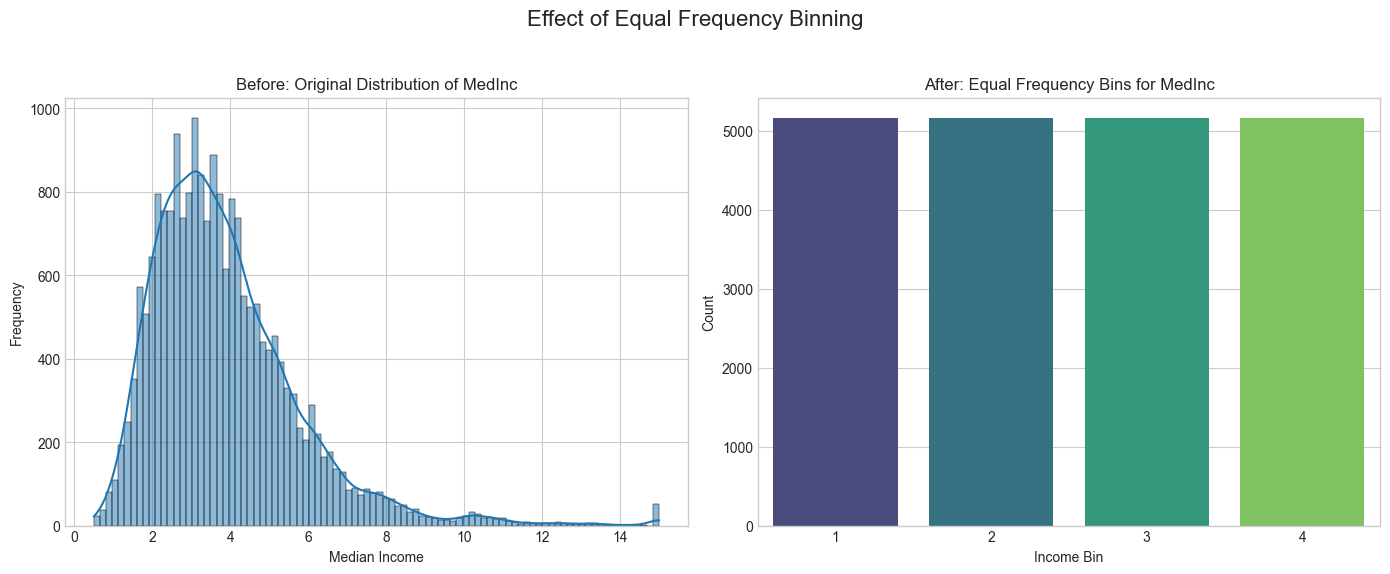


Head of the DataFrame with the new binned column:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  MedInc_Binned  
0    -122.23        4.526              4  
1    -122.22        3.585              4  
2    -122.24        3.521              4  
3    -122.25        3.413              4  
4    -122.25        3.422              3  


In [1]:
# -*- coding: utf-8 -*-
"""
This script demonstrates Equal Frequency Binning (also known as Quantile Binning)
on a sample dataset.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import KBinsDiscretizer

# --- When to Use Equal Frequency Binning ---
#
# Equal Frequency Binning is a data transformation technique used to convert
# continuous numerical variables into discrete categorical variables.
#
# When to use it:
# 1. To handle skewed data: It can help spread out the distribution of a variable,
#    which can be beneficial for some machine learning models.
# 2. For models that require categorical input: Some algorithms, like certain
#    types of Naive Bayes, cannot handle continuous data directly.
# 3. To reduce the impact of outliers: By grouping outliers into a bin with
#    other values, their influence on the model can be diminished.
# 4. To capture non-linear relationships: Binning can help linear models
#    capture non-linear patterns in the data.
#
# Requirements:
# - The input data must be numerical.
# - The number of bins is a user-defined parameter that needs to be chosen carefully.

# 1. FIND AND LOAD A RELEVANT DATASET FROM SCIKIT-LEARN
print("Loading the California Housing dataset...")
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target # Add target variable for context

# 2. SELECT A FEATURE TO WORK WITH
# We will work with the 'MedInc' (Median Income) feature.
# It's a continuous variable with a skewed distribution, making it a
# good candidate for binning.
feature_to_bin = 'MedInc'
print(f"Selected feature for binning: '{feature_to_bin}'")

# 3. APPLY EQUAL FREQUENCY BINNING
# We will use scikit-learn's KBinsDiscretizer for this task.
# - n_bins: The number of bins to create. We'll use 4 to create quartiles.
# - strategy='quantile': This ensures that each bin has approximately the
#   same number of samples.
# - encode='ordinal': This assigns an integer value to each bin.
n_bins = 4
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile', subsample=None)

# Reshape the data for the discretizer and apply the transformation
# The discretizer expects a 2D array, so we reshape our pandas Series.
data_to_transform = df[[feature_to_bin]].values
binned_data = discretizer.fit_transform(data_to_transform)

# Create a new column in the DataFrame to store the transformed data.
# We add 1 to the bin numbers to make them more intuitive (1, 2, 3, 4 instead of 0, 1, 2, 3)
new_column_name = f'{feature_to_bin}_Binned'
df[new_column_name] = binned_data.astype(int) + 1
print(f"Created new binned column: '{new_column_name}'")


# 4. SHOW THE RESULT OF APPLYING THE TECHNIQUE
# We can verify the result by checking the value counts of the new binned column.
# Each bin should have a similar number of observations.
print("\nValue counts for each bin:")
print(df[new_column_name].value_counts().sort_index())

# Create a simple before-and-after visualization to show the effect.
print("\nGenerating before-and-after visualization...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before: Histogram of the original data
sns.histplot(df[feature_to_bin], kde=True, ax=axes[0])
axes[0].set_title(f'Before: Original Distribution of {feature_to_bin}')
axes[0].set_xlabel('Median Income')
axes[0].set_ylabel('Frequency')

# After: Count plot of the binned data
sns.countplot(x=new_column_name, data=df, ax=axes[1], palette='viridis')
axes[1].set_title(f'After: Equal Frequency Bins for {feature_to_bin}')
axes[1].set_xlabel('Income Bin')
axes[1].set_ylabel('Count')

plt.suptitle('Effect of Equal Frequency Binning', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 5. PRINT THE HEAD OF THE RESULTING DATAFRAME
# The new column shows the discrete bin number for each row's Median Income.
print("\nHead of the DataFrame with the new binned column:")
print(df.head())
